# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and setip
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# incorporated citipy to determine city based on latitude and longiture
from citipy import citipy

In [2]:
# output file (CSV)
output_data_file = "output_data/cities.csv"

# range of ltitues and longitues
lat_range = (-90, 90)
lng_range = (-180,180)

## Generate Cities List

In [3]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size =1500)

lat_lngs=zip(lats,lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# creating empty list for the response
response_json = []

print("Beginning Data Retrieval ")
print("-----------------------------")

# create empty lists to hold the data for each city
City=[]
Lat=[]
Lng=[]
MaxTemp=[]
Humidity=[]
Cloudiness=[]
WindSpeed=[]
Country=[]
Date=[]

# the base url
url = "https://api.openweathermap.org/data/2.5/weather?"
limit = 50
rec = 1
set = 1

# Loop through all the cities in our list
for city in cities:
        
#     # Group cities in sets of 50 for logging purposes
#     if (i % 50 == 0 and i >= 50):
#         set += 1
#         rec = 0

#     # Create endpoint URL with each city
#     city_url = url + "&q=" + city

    # Add 1 to the record count
    query_url = url + "appid=" + weather_api_key  + "&units=imperial" + "&q="


    try:
        # get city's weather
        weatherresponse = requests.get(query_url+city).json()
        # load data to the open list
        City.append(weatherresponse["name"])
        Lat.append(weatherresponse["coord"]["lat"])
        Lng.append(weatherresponse["coord"]["lon"])
        MaxTemp.append(weatherresponse["main"]["temp_max"])
        Humidity.append(weatherresponse["main"]["humidity"])
        Cloudiness.append(weatherresponse["clouds"]["all"])
        WindSpeed.append(weatherresponse["wind"]["speed"])
        Country.append(weatherresponse["sys"]["country"])
        Date.append(weatherresponse["dt"])
        response_json.append(city)
        

    # Log the url, record, and set numbers
        print(f"Processing Record {rec, city}")
        rec += 1
    
    except KeyError:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record (1, 'bagdarin')
Processing Record (2, 'bethel')
Processing Record (3, 'mataura')
Processing Record (4, 'maragogi')
Processing Record (5, 'bluff')
Processing Record (6, 'longyearbyen')
Processing Record (7, 'lalmohan')
Processing Record (8, 'hithadhoo')
Processing Record (9, 'kapaa')
Processing Record (10, 'hermanus')
Processing Record (11, 'avera')
Processing Record (12, 'albany')
Processing Record (13, 'meulaboh')
Processing Record (14, 'comodoro rivadavia')
Processing Record (15, 'kletskaya')
Processing Record (16, 'sorong')
Processing Record (17, 'upernavik')
Processing Record (18, 'fairview')
Processing Record (19, 'rikitea')
Processing Record (20, 'tshikapa')
Processing Record (21, 'pevek')
Processing Record (22, 'chokurdakh')
Processing Record (23, 'pingliang')
Processing Record (24, 'contamana')
Processing Record (25, 'torbay')
Processing Record (26, 'severiano melo')
Processing Record (27, 'yumen')
Proces

Processing Record (220, 'sapa')
Processing Record (221, 'katobu')
Processing Record (222, 'manyana')
City not found. Skipping...
Processing Record (223, 'havelock')
City not found. Skipping...
Processing Record (224, 'burns lake')
Processing Record (225, 'oranjemund')
Processing Record (226, 'butte')
Processing Record (227, 'russell')
Processing Record (228, 'san juan del parana')
City not found. Skipping...
Processing Record (229, 'ostrovnoy')
Processing Record (230, 'khani')
Processing Record (231, 'sechura')
Processing Record (232, 'tiksi')
Processing Record (233, 'batagay')
Processing Record (234, 'norman wells')
Processing Record (235, 'boca do acre')
Processing Record (236, 'olinda')
City not found. Skipping...
Processing Record (237, 'bolu')
Processing Record (238, 'gazojak')
Processing Record (239, 'gurupi')
Processing Record (240, 'calabozo')
Processing Record (241, 'armeria')
City not found. Skipping...
Processing Record (242, 'dikson')
Processing Record (243, 'sao filipe')
C

Processing Record (424, 'mareeba')
Processing Record (425, 'mogadishu')
Processing Record (426, 'show low')
Processing Record (427, 'petropavlovsk-kamchatskiy')
Processing Record (428, 'marzuq')
Processing Record (429, 'uvira')
City not found. Skipping...
Processing Record (430, 'porto novo')
Processing Record (431, 'mandali')
Processing Record (432, 'kalmar')
Processing Record (433, 'alyangula')
Processing Record (434, 'noumea')
Processing Record (435, 'evensk')
Processing Record (436, 'baniyas')
City not found. Skipping...
Processing Record (437, 'taft')
Processing Record (438, 'hirata')
Processing Record (439, 'bystrzyca klodzka')
Processing Record (440, 'klaksvik')
Processing Record (441, 'kampen')
Processing Record (442, 'kupang')
Processing Record (443, 'oyem')
Processing Record (444, 'berlevag')
Processing Record (445, 'pomoryany')
Processing Record (446, 'luderitz')
Processing Record (447, 'vila franca do campo')
Processing Record (448, 'baykit')
Processing Record (449, 'puerto

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({"City":City,
             "Lat":Lat,
             "Lng":Lng,
             "Max_Temp":MaxTemp,
             "Humidity":Humidity,
             "Cloudiness":Cloudiness,
             "Wind_Speed":WindSpeed,
             "Country":Country,
             "Date":Date}
)

In [6]:
#weather_df = weather_df.dropna(axis=0, inplace=True)
#weather_df = pd.DataFrame.from_dict(city_data)
#weather_df.to_csv("../output_data/cities.csv", index=False, header=True)
#weather_df.head()

city_df.to_csv("../output_data/cities.csv", index=False, header=True)
city_df.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Bagdarin,54.4333,113.6000,3.90,85,100,1.07,RU,1611469644
1,Bethel,41.3712,-73.4140,21.20,45,1,13.80,US,1611469850
2,Mataura,-46.1927,168.8643,57.99,78,53,18.99,NZ,1611469851
3,Maragogi,-9.0122,-35.2225,75.94,84,94,8.01,BR,1611469852
4,Bluff,-46.6000,168.3333,57.99,78,58,21.00,NZ,1611469675


In [7]:
city_df.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,18.368675,18.651709,50.281751,73.882662,56.189142,7.669720,1.611470e+09
std,33.828688,90.022518,34.172777,20.228655,40.195260,5.719713,1.724120e+02
min,-54.800000,-175.200000,-55.410000,9.000000,0.000000,0.270000,1.611470e+09
25%,-9.192450,-60.212800,32.000000,65.000000,13.000000,3.440000,1.611470e+09
50%,19.166700,20.866700,62.010000,79.000000,75.000000,6.330000,1.611470e+09
75%,48.733300,99.925500,75.965000,89.000000,98.000000,10.360000,1.611470e+09
max,78.218600,179.316700,107.600000,100.000000,100.000000,37.220000,1.611470e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#  use an empty list to get the humidity >100%
city_df_outliers = []
if city_df['Humidity'].max() > 100:
    city_df_outliers = city_df.loc[city_df['Humidity'] > 90].index

city_df_outliers

[]

In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df[~city_df.index.isin(city_df_outliers)]
clean_city_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,Bagdarin,54.4333,113.6000,3.90,85,100,1.07,RU,1611469644
1,Bethel,41.3712,-73.4140,21.20,45,1,13.80,US,1611469850
2,Mataura,-46.1927,168.8643,57.99,78,53,18.99,NZ,1611469851
3,Maragogi,-9.0122,-35.2225,75.94,84,94,8.01,BR,1611469852
4,Bluff,-46.6000,168.3333,57.99,78,58,21.00,NZ,1611469675


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

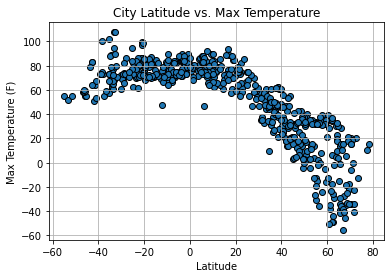

In [46]:
# Create a Scatter Plot for Latitude vs Temperature 
plt.scatter(clean_city_data["Lat"], clean_city_data["Max_Temp"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.savefig("../output_data/Fig1.png")
plt.show()

The scatter plot shows the city latitude vs Max temperature and from the graph it can be seens that when it is close tto the 0 latitude the higher temperature and as the latitude increases or decreases the temperature will drop showing somewhat a parabolic shape

## Latitude vs. Humidity Plot

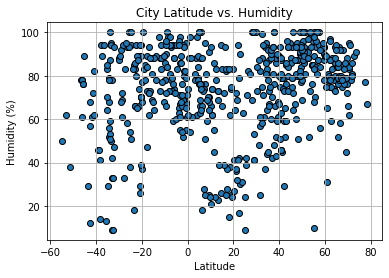

In [47]:
# Create a Scatter Plot for Latitude vs Humidity Plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)
plt.savefig("../output_data/Fig2.png")
plt.show()

The scatterplot shows the relationship between city latitude against the humidity. From the graph we can see that it is the more the latitude increase the higher the humidity which the case with northern hemisphere

## Latitude vs. Cloudiness Plot

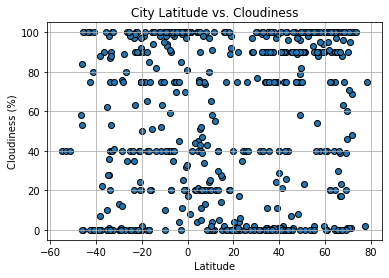

In [48]:
#Create a Scatter Plot for Latitude vs Cloudiness 
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)
plt.savefig("../output_data/Fig3.png")
plt.show()

The scatter plot shows the relationship between the latitude against the cloudiness. However from the graph you can see that there is no clear correlation that can be reported

## Latitude vs. Wind Speed Plot

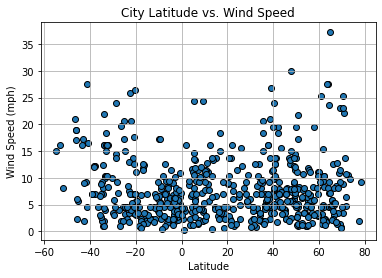

In [49]:
# Create a Scatter Plot for Latitude vs Wind Speed Plot 
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind_Speed"], marker= 'o', edgecolors='black')
plt.xlabel("Latitude") 
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)
plt.savefig("../output_data/Fig4.png")
plt.show()

The scatter plot shows the relationship between the latitude against the wind speed and from the plot it can be seen that the wind speed doesnt really change even with increasing or decreasing latitudes

## Linear Regression

In [27]:
# Find cities in Northern Hemisphere 
northern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] >= 0] 

# Find cities in Southern Hemisphere 
southern_hemisphere = clean_city_data.loc[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7342583783145006


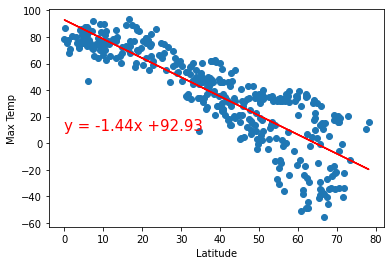

In [30]:
# Perform a linear regression on Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Max_Temp'])

# Get regression values
regressval = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
lineeq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Max_Temp'])
plt.plot(northern_hemisphere['Lat'],regressval,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(lineeq,(0,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The linear regression in the temeprature vs latitude in the northern hemisphere can be seen that there is a strong negative correlation between the 2 data sets

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.123833583486327


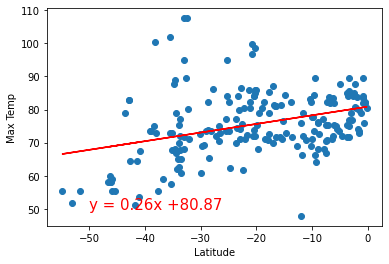

In [33]:
# Perform a linear regression on Northern Hemisphere - Max Temp vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Max_Temp'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Max_Temp'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a weak positive correlation between the temperature vs latitude in the southern hemisphere from the graph

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11140848230259395


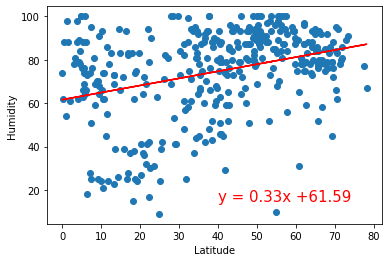

In [34]:
# Perform a linear regression on Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Humidity'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a weak positive correlation between the humidity vs northern hemisphere latitude linear regression modelling

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0912864194306904


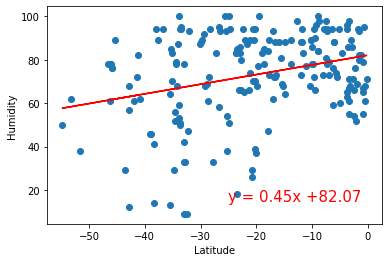

In [35]:
# Perform a linear regression on Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Humidity'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a weak positive correlation between the southern hemisphere latitude against the humidity in the linear regression modelling

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06452853245769047


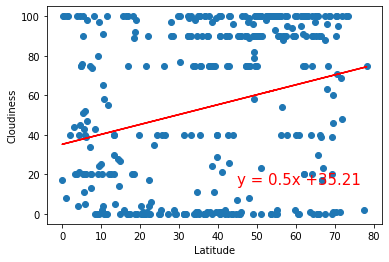

In [36]:
# Perform a linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a weak positive correlation between the northern hemisphere latitude against the cloudiness in the linear regression modelling

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09961927892354525


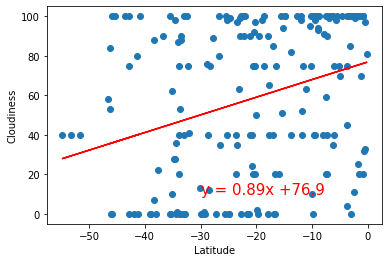

In [37]:
# Perform a linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a weak correlation between the southern hemisphere latitude against the cloudiness in the linear regression modelling

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0031681194525481687


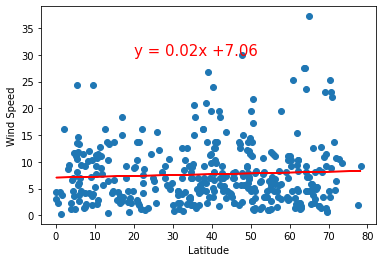

In [39]:
# Perform a linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere['Lat'], northern_hemisphere['Wind_Speed'])

# Get regression values
regress_values = northern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Wind_Speed'])
plt.plot(northern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is weak correlation between the northern hemisphere latitude against the wind speed in the linear regression modelling to the point that it is almost straight line

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14025479433998356


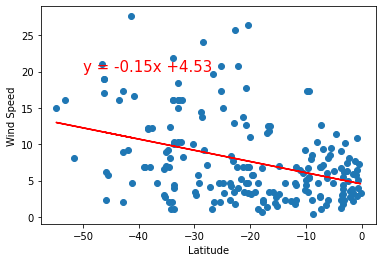

In [41]:
# Perform a linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere['Lat'], southern_hemisphere['Wind_Speed'])

# Get regression values
regress_values = southern_hemisphere['Lat'] * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Wind_Speed'])
plt.plot(southern_hemisphere['Lat'],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

There is a weak negative correlation between the southern hemisphere latitude against the wind speed that can be seen on the linear regression modelling.

# Observation
1.) Southern hemisphere have more water compared to the northern hence the humidity is higher in the southern hesmiphere

2.) The season are interchangeable as, if the sourthern hemisphere is in winter season then the northern hemisphere would be in summer vice versa

3.) The southern hemisphere are warmer and have more country that is in tropical

4.) There is no clear trend that can be seen between the humidity & latitude

5.) There is no clear trend that can be seen between the cloudiness and latitude

6.) there is no clear trend that can be seen between the wind speed and latitude